In [2]:
from classy import *
from pylab import imread,imsave,imshow,float32,figure,subplot,title,text,axis
from numpy import atleast_2d
import numpy as np
from image_defs import *
from glob import glob
from my_robot_functions import *
from Game import Board

no module brickpi3...running in offline mode
Version:  0.0.35
Running on the laptop.
Version:  0.3.13


In [3]:
board_picture_folder='images/Robot Pics 2/'
square_images_folder='images/Robot Pics 2 squares'
image_to_use_for_corners="images/Robot Pics 2/image_filename50.jpg"

corners= array([[ 425.,   52.],
       [1205.,   30.],
       [1270.,  849.],
       [ 373.,  862.]], dtype=float32) 


- if you want to test the read_state function, pretending to be the robot, copy one of the board images to current_board.jpg

In [4]:
def read_state_from_file(filename):
    text=open(filename).read()
    text=text.strip()
    lines=[line.strip() for line in text.split('\n')]  # get rid of \n
    
    row=lines[0].split()
    R,C=len(lines),len(row)
    print(f"{R}x{C} board")
    state=Board(R,C)
    state.board=[int(val) for val in text.split()]  
    print(state)
    return state

## Read State

In [5]:
filenames=glob("images/Test Robot Pics 2/image_filename*.jpg")

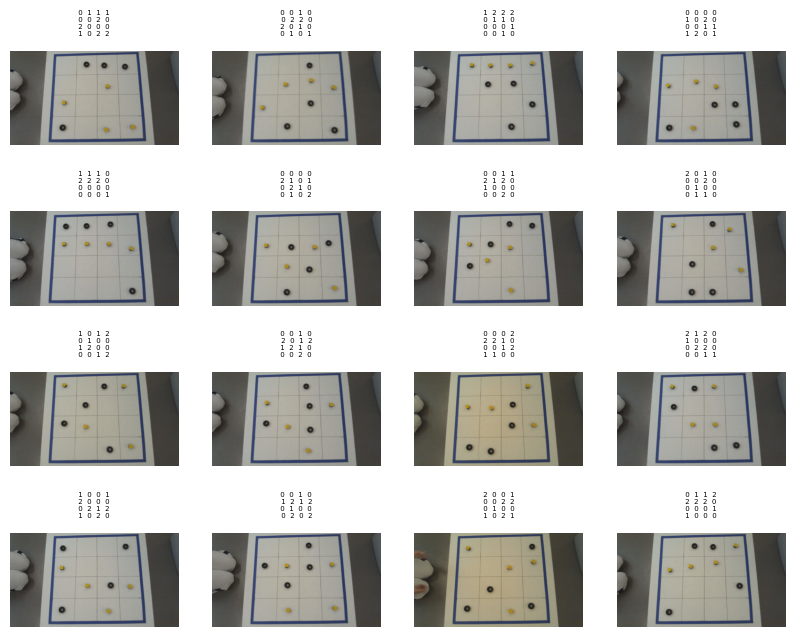

In [6]:
C=int(np.ceil(np.sqrt(len(filenames))))
R=int(np.ceil(len(filenames)/C))

for f,filename in enumerate(filenames):
    subplot(R,C,f+1)
    
    state=Board(4,4)      #<========= change the size
    nr,nc=state.shape
    
    # load the classifier
    classifier=CSC()
    classifier.load('CSC_trained.json')
    
    # this part comes from your Make Training Squares script
    image=imread(filename)    
    im3=straighten_image(image,corners)
    squares=get_board_squares_from_image(im3,
                                     state.shape,
                                     middle_pixels=20)  # <=== check this
    
    imshow(image)
        
    count=0
    values=[]
    
    for r in range(nr):
        for c in range(nc):
            # convert the square image to a data vector for the classifier
            vector=squares[count].ravel()
            prediction=classifier.predict(atleast_2d(vector))[0]
        
            values.append(prediction)
    
            count+=1
    
    
    # reconstruct the state from the predictions
    state.board=values
    
    title(str(state),fontsize=5)
    axis('off')


In [11]:
def read_state():
    from pylab import imread,imsave
    from numpy import atleast_2d
    import os

    state=Board(4,4)      #<========= change the size
    nr,nc=state.shape

    
    # load the classifier
    classifier=CSC()
    classifier.load('CSC_trained.json')
    
    
    # get the picture
    filename='current_board.jpg'              # for the robot
    take_picture(filename)


    # this part comes from your Make Training Squares script
    image=imread(filename)

    # these few lines are specific to your image
    corners= array([[ 425.,   52.],
       [1205.,   30.],
       [1270.,  849.],
       [ 373.,  862.]], dtype=float32) 

    
    im3=straighten_image(image,corners)
    squares=get_board_squares_from_image(im3,
                                     state.shape,
                                     middle_pixels=20)  # <=== check this

    # for debugging
    if not os.path.exists('predicted'):
        os.mkdir('predicted')

    count=0
    values=[]
    if on_laptop:
        figure()

    
    for r in range(nr):
        for c in range(nc):
            # convert the square image to a data vector for the classifier
            vector=squares[count].ravel()
            prediction=classifier.predict(atleast_2d(vector))[0]
        
            values.append(prediction)
    
            # for debugging
            imsave('predicted/square %d predicted as piece %d.jpg' % (count,prediction),squares[count])

            count+=1

    
    # reconstruct the state from the predictions
    state.board=values

    print("Current state is:")
    print(state)

    x=input("""
    Hit return if this is correct, otherwise type a character 
    and the state will be read from board.txt... 
    or type in a Board string like 111/000/222: """)

    if x:
        if "/" in x and '0' in x:
            state=Board(x)
        else:
            print("Reading from file...")
            state=read_state_from_file('board.txt')

    print("Using")
    print(state)

    
    return state

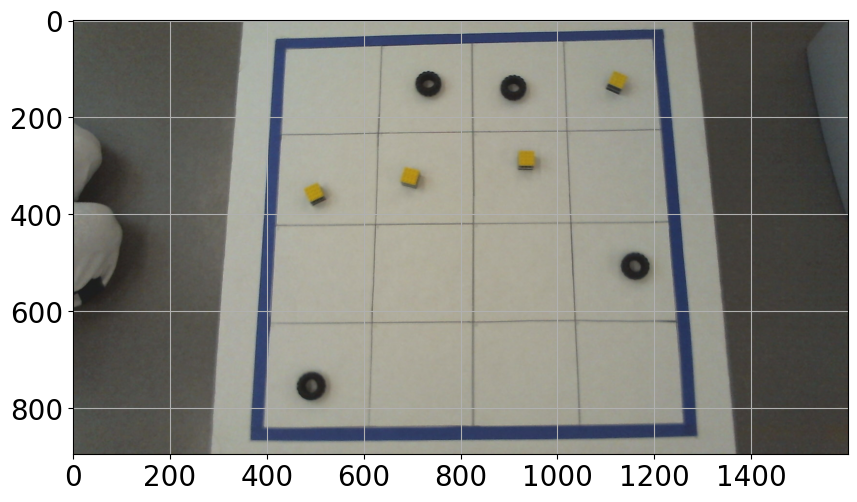

In [12]:
filename='current_board.jpg'              # for the robot
image=imread(filename)
imshow(image)


In [14]:
state=read_state()     #  read the state from the world

(REMOVE THIS FUNCTION FROM my_robot_functions IF YOU'RE ON THE ROBOT
        --- Opening /dev/video0...
    Trying source module v4l2...
    /dev/video0 opened.
    No input was specified, using the first.
    Setting Brightness to 255 (100%).
    Adjusting resolution from 1600x900 to 1600x896.
    --- Capturing frame...
    Captured frame in 0.00 seconds.
    --- Processing captured image...
    Disabling banner.
    Writing JPEG image to 'current_board.jpg'.
        
Current state is:
 0  1  1  2 
 2  2  2  0 
 0  0  0  1 
 1  0  0  0 




    Hit return if this is correct, otherwise type a character 
    and the state will be read from board.txt... 
    or type in a Board string like 111/000/222:  


Using
 0  1  1  2 
 2  2  2  0 
 0  0  0  1 
 1  0  0  0 



<Figure size 1000x800 with 0 Axes>